In [1]:
import featuretools as ft
import pandas

import warnings
warnings.filterwarnings('ignore')

pandas.options.display.max_columns=150

/Users/home/.virtualenvs/featuretools/lib/python3.9/site-packages/ipykernel/pylab/config.py:70: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [2]:
data = ft.demo.load_mock_customer()

In [3]:
entities = {
    'customers': (data['customers'], 'customer_id'),
    'sessions' : (data['sessions'], 'session_id', 'session_start'),
    'transactions' : (data['transactions'], 'transaction_id', 'transaction_time')
}

In [4]:
relationships = [
    ('customers', 'customer_id', 'sessions', 'customer_id'),
    ('sessions', 'session_id', 'transactions', 'session_id')
]

In [5]:
feature_matrix_customer, features_defs = ft.dfs(
    entities=entities,
    relationships=relationships,
    target_entity='customers'
)

feature_matrix_customer

,zip_code,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),STD(transactions.amount),SUM(transactions.amount),DAY(date_of_birth),DAY(join_date),MONTH(date_of_birth),MONTH(join_date),WEEKDAY(date_of_birth),WEEKDAY(join_date),YEAR(date_of_birth),YEAR(join_date),MAX(sessions.COUNT(transactions)),MAX(sessions.MEAN(transactions.amount)),MAX(sessions.MIN(transactions.amount)),MAX(sessions.NUM_UNIQUE(transactions.product_id)),MAX(sessions.SKEW(transactions.amount)),MAX(sessions.STD(transactions.amount)),MAX(sessions.SUM(transactions.amount)),MEAN(sessions.COUNT(transactions)),MEAN(sessions.MAX(transactions.amount)),MEAN(sessions.MEAN(transactions.amount)),MEAN(sessions.MIN(transactions.amount)),MEAN(sessions.NUM_UNIQUE(transactions.product_id)),MEAN(sessions.SKEW(transactions.amount)),MEAN(sessions.STD(transactions.amount)),MEAN(sessions.SUM(transactions.amount)),MIN(sessions.COUNT(transactions)),MIN(sessions.MAX(transactions.amount)),MIN(sessions.MEAN(transactions.amount)),MIN(sessions.NUM_UNIQUE(transactions.product_id)),MIN(sessions.SKEW(transactions.amount)),MIN(sessions.STD(transactions.amount)),MIN(sessions.SUM(transactions.amount)),MODE(sessions.DAY(session_start)),MODE(sessions.MODE(transactions.product_id)),MODE(sessions.MONTH(session_start)),MODE(sessions.WEEKDAY(session_start)),MODE(sessions.YEAR(session_start)),NUM_UNIQUE(sessions.DAY(session_start)),NUM_UNIQUE(sessions.MODE(transactions.product_id)),NUM_UNIQUE(sessions.MONTH(session_start)),NUM_UNIQUE(sessions.WEEKDAY(session_start)),NUM_UNIQUE(sessions.YEAR(session_start)),SKEW(sessions.COUNT(transactions)),SKEW(sessions.MAX(transactions.amount)),SKEW(sessions.MEAN(transactions.amount)),SKEW(sessions.MIN(transactions.amount)),SKEW(sessions.NUM_UNIQUE(transactions.product_id)),SKEW(sessions.STD(transactions.amount)),SKEW(sessions.SUM(transactions.amount)),STD(sessions.COUNT(transactions)),STD(sessions.MAX(transactions.amount)),STD(sessions.MEAN(transactions.amount)),STD(sessions.MIN(transactions.amount)),STD(sessions.NUM_UNIQUE(transactions.product_id)),STD(sessions.SKEW(transactions.amount)),STD(sessions.SUM(transactions.amount)),SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.customer_id),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.customer_id),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60091,8,mobile,3,126,139.43,71.631905,5.81,4,5,0.019698,40.442059,9025.62,18,17,7,4,0,6,1994,2011,25,88.755625,26.36,5,0.640252,46.905665,1613.93,15.750000,132.246250,72.774140,9.823750,5.000000,-0.059515,39.093244,1128.202500,12,118.90,50.623125,5,-1.038434,30.450261,809.97,1,4,1,2,2014,1,4,1,1,1,1.946018,-0.780493,-0.424949,2.440005,0.000000,-0.312355,0.778170,4.062019,7.322191,13.759314,6.954507,0.000000,0.589386,279.510713,1057.97,582.193117,78.59,40,-0.476122,312.745952,1,mobile,1,3
2,13244,7,desktop,3,93,146.81,77.422366,8.73,4,5,0.098259,37.705178,7200.28,18,15,8,4,0,6,1986,2012,18,96.581000,56.46,5,0.755711,47.935920,1320.64,13.285714,133.090000,78.415122,22.085714,5.000000,-0.039663,36.957218,1028.611429,8,100.04,61.910000,5,-0.763603,27.839228,634.84,1,3,1,2,2014,1,4,1,1,1,-0.303276,-1.539467,0.235296,2.154929,0.000000,0.013087,-0.440929,3.450328,17.221593,11.477071,15.874374,0.000000,0.509798,251.609234,931.63,548.905851,154.60,35,-0.277640,258.700528,2,desktop,1,3
3,13244,6,desktop,3,93,149.15,67.060430,5.89,1,5,0.418230,43.683296,6236.62,21,13,11,8,4,5,2003,2011,18,82.109444,20.06,5,0.854976,50.110120,1477.97,15.500000,141.271667,67.539577,1

In [6]:
feature_matrix_session, features_defs = ft.dfs(
    entities=entities,
    relationships=relationships,
    target_entity='sessions'
)

feature_matrix_session

,customer_id,device,COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),STD(transactions.amount),SUM(transactions.amount),DAY(session_start),MONTH(session_start),WEEKDAY(session_start),YEAR(session_start),customers.zip_code,MODE(transactions.DAY(transaction_time)),MODE(transactions.MONTH(transaction_time)),MODE(transactions.WEEKDAY(transaction_time)),MODE(transactions.YEAR(transaction_time)),NUM_UNIQUE(transactions.DAY(transaction_time)),NUM_UNIQUE(transactions.MONTH(transaction_time)),NUM_UNIQUE(transactions.WEEKDAY(transaction_time)),NUM_UNIQUE(transactions.YEAR(transaction_time)),customers.COUNT(sessions),customers.MODE(sessions.device),customers.NUM_UNIQUE(sessions.device),customers.COUNT(transactions),customers.MAX(transactions.amount),customers.MEAN(transactions.amount),customers.MIN(transactions.amount),customers.MODE(transactions.product_id),customers.NUM_UNIQUE(transactions.product_id),customers.SKEW(transactions.amount),customers.STD(transactions.amount),customers.SUM(transactions.amount),customers.DAY(date_of_birth),customers.DAY(join_date),customers.MONTH(date_of_birth),customers.MONTH(join_date),customers.WEEKDAY(date_of_birth),customers.WEEKDAY(join_date),customers.YEAR(date_of_birth),customers.YEAR(join_date)
session_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,desktop,16,141.66,76.813125,20.91,3,5,0.295458,41.600976,1229.01,1,1,2,2014,13244,1,1,2,2014,1,1,1,1,7,desktop,3,93,146.81,77.422366,8.73,4,5,0.098259,37.705178,7200.28,18,15,8,4,0,6,1986,2012
2,5,mobile,10,135.25,74.696000,9.32,5,5,-0.160550,45.893591,746.96,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,6,mobile,3,79,149.02,80.375443,7.55,5,5,-0.025941,44.095630,6349.66,28,17,7,7,5,5,1984,2010
3,4,mobile,15,147.73,88.600000,8.70,1,5,-0.324012,46.240016,1329.00,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,8,mobile,3,109,149.95,80.070459,5.73,2,5,-0.036348,45.068765,8727.68,15,8,8,4,1,4,2006,2011
4,1,mobile,25,129.00,64.557200,6.29,5,5,0.234349,40.187205,1613.93,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,8,mobile,3,126,139.43,71.631905,5.81,4,5,0.019698,40.442059,9025.62,18,17,7,4,0,6,1994,2011
5,4,mobile,11,139.20,70.638182,7.43,5,5,0.336381,48.918663,777.02,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,8,mobile,3,109,149.95,80.070459,5.73,2,5,-0.036348,45.068765,8727.68,15,8,8,4,1,4,2006,2011
6,1,tablet,15,139.23,84.440000,8.74,4,5,-0.134754,42.654755,1266.60,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,8,mobile,3,126,139.43,71.631905,5.81,4,5,0.019698,40.442059,9025.62,18,17,7,4,0,6,1994,2011
7,3,tablet,15,146.31,62.791333,8.19,1,5,0.618455,47.264797,941.87,1,1,2,2014,13244,1,1,2,2014,1,1,1,1,6,desktop,3,93,149.15,67.060430,5.89,1,5,0.418230,43.683296,6236.62,21,13,11,8,4,5,2003,2011
8,4,tablet,18,143.85,75.081111,12.59,1,5,0.200676,44.213242,1351.46,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,8,mobile,3,109,149.95,80.070459,5.73,2,5,-0.036348,45.068765,8727.68,15,8,8,4,1,4,2006,2011
9,1,desktop,15,132.72,70.135333,5.81,1,5,0.226337,46.905665,1052.03,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,8,mobile,3,126,139.43,71.631905,5.81,4,5,0.019698,40.442059,9025.62,18,17,7,4,0,6,1994,2011


In [7]:
feature = features_defs[18]
feature

<Feature: MODE(transactions.WEEKDAY(transaction_time))>

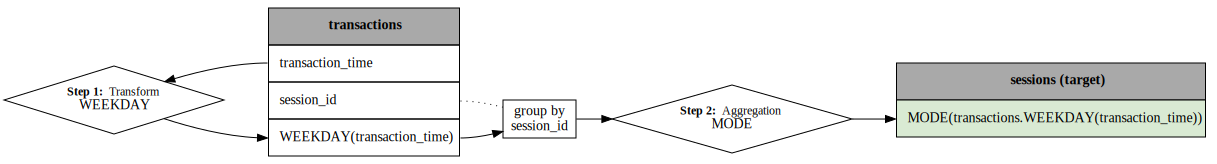

In [8]:
ft.graph_feature(feature)

In [9]:
ft.describe_feature(feature)

'The most frequently occurring value of the day of the week of the "transaction_time" of all instances of "transactions" for each "session_id" in "sessions".'

In [10]:
for el in features_defs:
    print(ft.describe_feature(el))

The "customer_id".
The "device".
The number of all instances of "transactions" for each "session_id" in "sessions".
The maximum of the "amount" of all instances of "transactions" for each "session_id" in "sessions".
The average of the "amount" of all instances of "transactions" for each "session_id" in "sessions".
The minimum of the "amount" of all instances of "transactions" for each "session_id" in "sessions".
The most frequently occurring value of the "product_id" of all instances of "transactions" for each "session_id" in "sessions".
The number of unique elements in the "product_id" of all instances of "transactions" for each "session_id" in "sessions".
The skewness of the "amount" of all instances of "transactions" for each "session_id" in "sessions".
The standard deviation of the "amount" of all instances of "transactions" for each "session_id" in "sessions".
The sum of the "amount" of all instances of "transactions" for each "session_id" in "sessions".
The day of the month of th

In [11]:
c1_sess = list(data['sessions'][data['sessions']['customer_id']==1]['session_id'])
data['sessions'][data['sessions']['customer_id']==1]

,session_id,customer_id,device,session_start
3,4,1,mobile,2014-01-01 00:44:25
5,6,1,tablet,2014-01-01 01:23:25
8,9,1,desktop,2014-01-01 02:15:25
13,14,1,tablet,2014-01-01 03:28:00
17,18,1,desktop,2014-01-01 04:14:35
25,26,1,tablet,2014-01-01 06:17:00
26,27,1,mobile,2014-01-01 06:34:20
28,29,1,mobile,2014-01-01 07:10:05


In [12]:
data['transactions'][data['transactions']['session_id'].isin(c1_sess)]

,transaction_id,session_id,transaction_time,product_id,amount
41,290,4,2014-01-01 00:44:25,4,21.35
42,275,4,2014-01-01 00:45:30,5,108.11
43,101,4,2014-01-01 00:46:35,5,112.53
44,80,4,2014-01-01 00:47:40,5,6.29
45,484,4,2014-01-01 00:48:45,3,47.95
...,...,...,...,...,...
408,386,29,2014-01-01 07:22:00,2,94.89
409,382,29,2014-01-01 07:23:05,4,104.93
410,476,29,2014-01-01 07:24:10,4,121.59
411,306,29,2014-01-01 07:25:15,4,116.33


In [13]:
data['customers']

,customer_id,zip_code,join_date,date_of_birth
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [14]:
data['transactions'][data['transactions']['session_id']==4]

,transaction_id,session_id,transaction_time,product_id,amount
41,290,4,2014-01-01 00:44:25,4,21.35
42,275,4,2014-01-01 00:45:30,5,108.11
43,101,4,2014-01-01 00:46:35,5,112.53
44,80,4,2014-01-01 00:47:40,5,6.29
45,484,4,2014-01-01 00:48:45,3,47.95
46,126,4,2014-01-01 00:49:50,2,124.29
47,268,4,2014-01-01 00:50:55,4,98.16
48,163,4,2014-01-01 00:52:00,5,31.37
49,293,4,2014-01-01 00:53:05,5,82.88
50,78,4,2014-01-01 00:54:10,1,37.50
